Immigration Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)

# Style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)

# Load data
data_path = "../data/reddit_comments_with_sentiment.csv"
df = pd.read_csv(data_path)
df.head()

,keyword,post_title,comment,score,created_utc,sentiment_score,sentiment_label
0,immigrant,British expats 'in tears' as Spain to deport 5...,Users often report submissions from this site ...,1,1.616873e+09,0.5994,positive
1,immigrant,British expats 'in tears' as Spain to deport 5...,I really don’t know what all the whining is ab...,13748,1.616880e+09,0.8893,positive
2,immigrant,British expats 'in tears' as Spain to deport 5...,Seriously why didn't they just register when a...,7845,1.616874e+09,-0.7003,negative
3,immigrant,British expats 'in tears' as Spain to deport 5...,"""I think the Spanish will regret chucking us o...",9591,1.616875e+09,-0.2023,negative
4,immigrant,British expats 'in tears' as Spain to deport 5...,An absolute gem in this article is Shaun Cromb...,12225,1.616876e+09,0.6542,positive


In [3]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9674 entries, 0 to 9673
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   keyword          9674 non-null   object 
 1   post_title       9674 non-null   object 
 2   comment          9674 non-null   object 
 3   score            9674 non-null   int64  
 4   created_utc      9674 non-null   float64
 5   sentiment_score  9674 non-null   float64
 6   sentiment_label  9674 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 529.2+ KB


,keyword,post_title,comment,score,created_utc,sentiment_score,sentiment_label
count,9674,9674,9674,9674.000000,9.674000e+03,9674.000000,9674
unique,4,14,6211,NaN,NaN,NaN,3
top,immigrant,Trumps Immigration Ban Halted By Federal Court,[deleted],NaN,NaN,NaN,positive
freq,2442,986,537,NaN,NaN,NaN,3470
mean,NaN,NaN,NaN,201.801323,1.561518e+09,-0.007062,NaN
std,NaN,NaN,NaN,1009.373169,6.971181e+07,0.495637,NaN
min,NaN,NaN,NaN,-15.000000,1.447860e+09,-0.998300,NaN
25%,NaN,NaN,NaN,6.000000,1.515725e+09,-0.381800,NaN
50%,NaN,NaN,NaN,18.000000,1.558285e+09,0.000000,NaN
75%,NaN,NaN,NaN,79.000000,1.614069e+09,0.372700,NaN


In [4]:
# Clean column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Remove duplicates & NaN
df = df.drop_duplicates(subset=["comment"]).dropna(subset=["sentiment_score", "sentiment_label"])

# Convert timestamp
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

df.head()


,keyword,post_title,comment,score,created_utc,sentiment_score,sentiment_label
0,immigrant,British expats 'in tears' as Spain to deport 5...,Users often report submissions from this site ...,1,2021-03-27 19:28:08,0.5994,positive
1,immigrant,British expats 'in tears' as Spain to deport 5...,I really don’t know what all the whining is ab...,13748,2021-03-27 21:19:03,0.8893,positive
2,immigrant,British expats 'in tears' as Spain to deport 5...,Seriously why didn't they just register when a...,7845,2021-03-27 19:31:54,-0.7003,negative
3,immigrant,British expats 'in tears' as Spain to deport 5...,"""I think the Spanish will regret chucking us o...",9591,2021-03-27 20:02:56,-0.2023,negative
4,immigrant,British expats 'in tears' as Spain to deport 5...,An absolute gem in this article is Shaun Cromb...,12225,2021-03-27 20:20:57,0.6542,positive


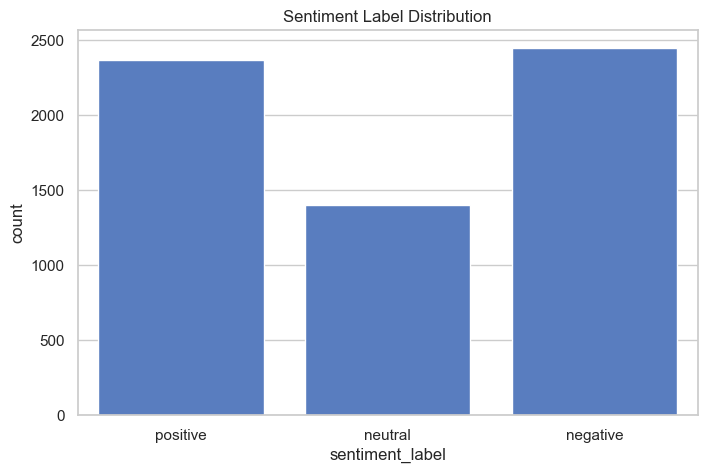

In [5]:
# Sentiment label distribution
sns.countplot(x="sentiment_label", data=df, order=["positive", "neutral", "negative"])
plt.title("Sentiment Label Distribution")
plt.show()

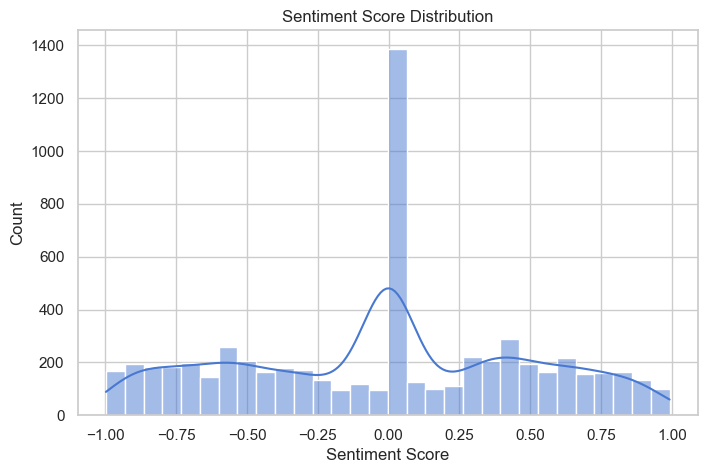

In [6]:
#  Sentiment score histogram
sns.histplot(df["sentiment_score"], kde=True, bins=30)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.show()


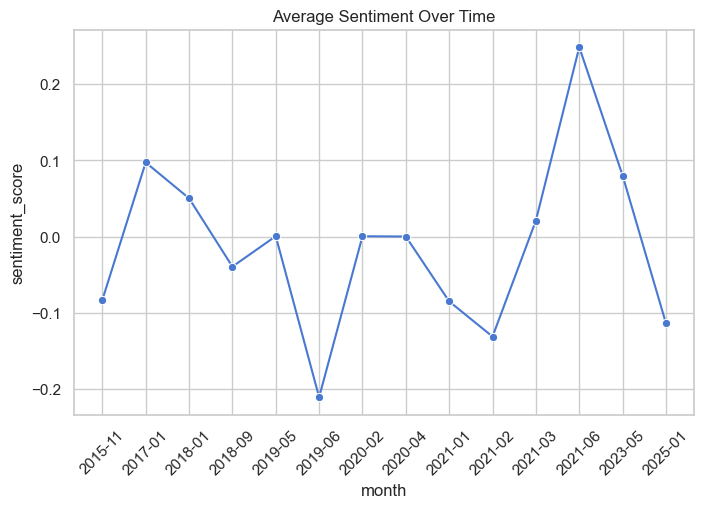

In [9]:
# Sentiment over time
df["month"] = df["created_utc"].dt.to_period("M").astype(str)
avg_sentiment = df.groupby("month")["sentiment_score"].mean().reset_index()

sns.lineplot(x="month", y="sentiment_score", data=avg_sentiment, marker="o")
plt.title("Average Sentiment Over Time")
plt.xticks(rotation=45)
plt.show()

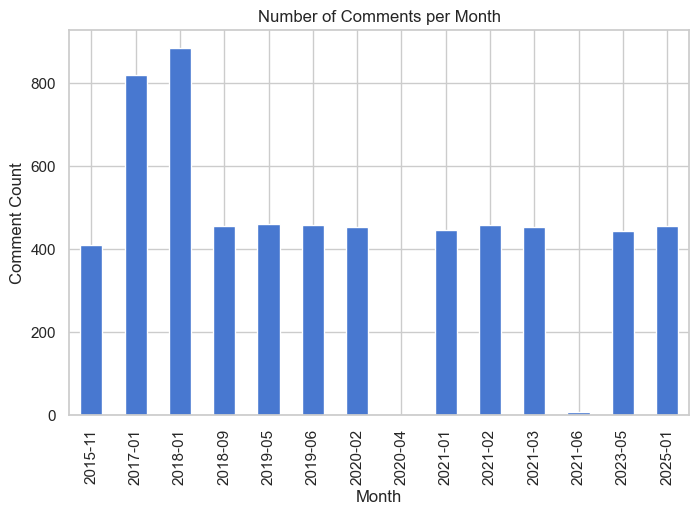

In [10]:
# top active months
monthly_counts = df["month"].value_counts().sort_index(ascending=True)
monthly_counts.plot(kind="bar")
plt.title("Number of Comments per Month")
plt.xlabel("Month")
plt.ylabel("Comment Count")
plt.show()


Text Level Analysis

Note: you may need to restart the kernel to use updated packages.


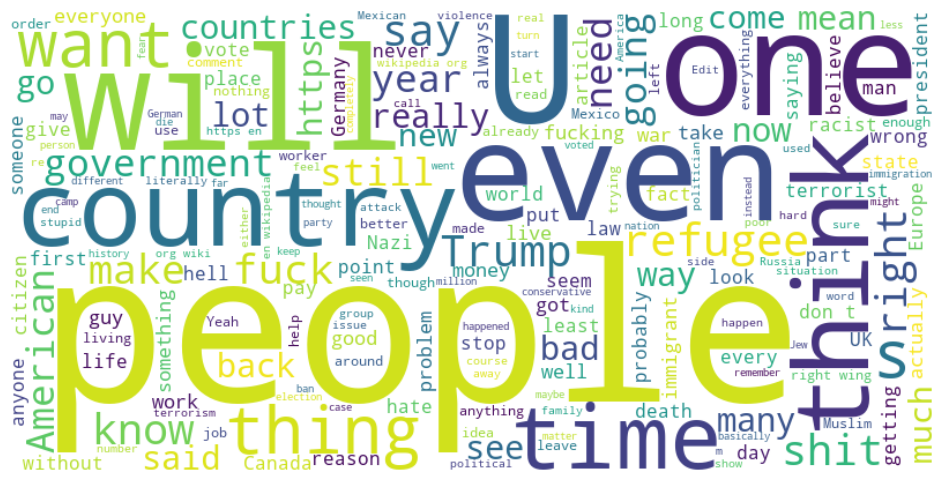

In [11]:
%pip install wordcloud

from wordcloud import WordCloud
text = " ".join(df[df["sentiment_label"]=="negative"]["comment"])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# Helps show what language dominates different sentiment groups (e.g., “illegal”, “welcome”, “border”, “rights”).

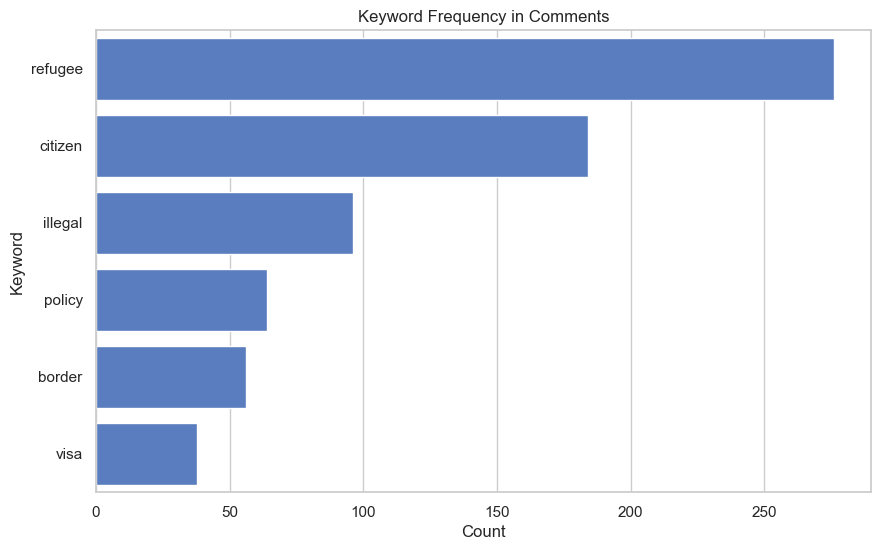

In [12]:
#key words freqquency
keywords = ["border", "refugee", "policy", "visa", "illegal", "citizen"]
for word in keywords:
    df[word] = df["comment"].str.contains(word, case=False, na=False)
plt.figure(figsize=(10, 6))
keyword_counts = df[keywords].sum().sort_values(ascending=False)
sns.barplot(x=keyword_counts.values, y=keyword_counts.index)
plt.title("Keyword Frequency in Comments")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()

N- Gram Analysis

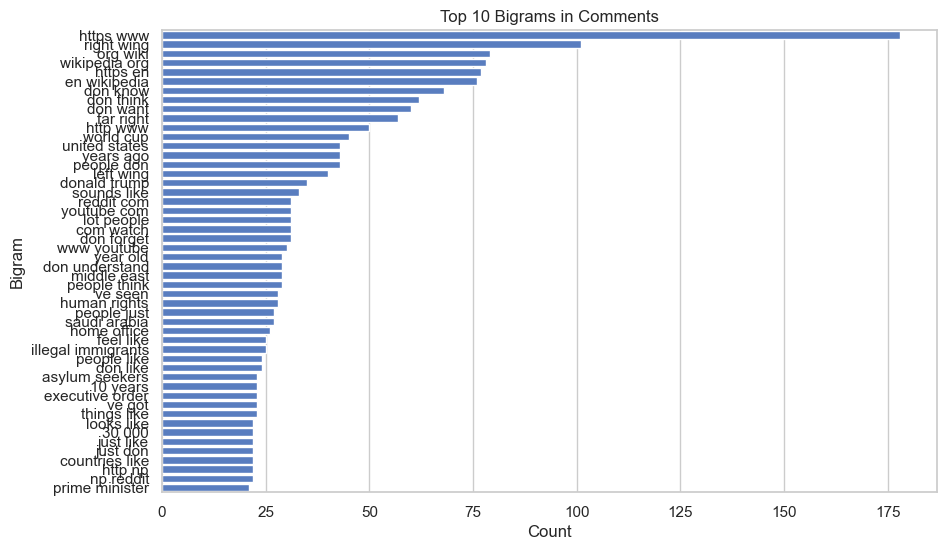

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2), stop_words="english").fit(df["comment"])
bigrams = cv.get_feature_names_out()
bigram_counts = cv.transform(df["comment"]).toarray().sum(axis=0)
bigram_df = pd.DataFrame({"bigram": bigrams, "count": bigram_counts})
top_bigrams = bigram_df.sort_values(by="count", ascending=False).head(50)   
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="bigram", data=top_bigrams)
plt.title("Top 10 Bigrams in Comments")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.show()


In [14]:
# Topic Modeling (LDA or BERTopic)
# trying to discover latent themes (like “policy debate”, “economy”, “culture”, “law enforcement”) in discussions.

from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5
cv = CountVectorizer(stop_words="english")
dtm = cv.fit_transform(df["comment"])
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

no_top_words = 10
feature_names = cv.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


Topic 1:
like | people | don | trump | just | government | fuck | d7 | news | make

Topic 2:
people | like | country | countries | trump | just | order | president | did | war

Topic 3:
just | people | don | like | know | said | trump | think | say | years

Topic 4:
people | like | don | country | just | right | think | refugees | good | time

Topic 5:
https | com | www | org | en | wikipedia | wiki | http | trump | world



The topic modeling results reveal five main themes present in the comments. The first topic centers on anti-government or political frustration, reflected in words like “government,” “trump,” and “fuck,” suggesting strong emotional or oppositional sentiment. The second topic focuses on national politics and international relations, referencing “country,” “president,” and “war,” indicating discussions about leadership and global affairs. The third topic captures general discussions or opinion sharing, featuring conversational terms like “know,” “said,” and “think.” The fourth topic highlights immigration and human rights, with references to “refugees,” “country,” and “right,” pointing to debates over social and ethical issues. Lastly, the fifth topic revolves around news and information sources, indicated by frequent mentions of “wikipedia,” “org,” and “https,” suggesting that users often cite external websites or reference materials to support their opinions.

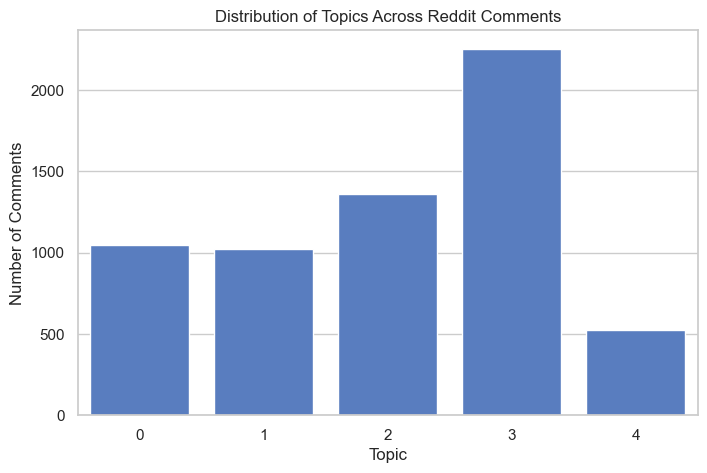

In [15]:
topic_values = lda.transform(dtm)
df["topic"] = topic_values.argmax(axis=1)

sns.countplot(x="topic", data=df)
plt.title("Distribution of Topics Across Reddit Comments")
plt.xlabel("Topic")
plt.ylabel("Number of Comments")
plt.show()


In [16]:
for i in range(n_topics):
    print(f"\nTopic {i+1} Sample Comments:")
    print(df[df["topic"] == i]["comment"].head(3).to_list())



Topic 1 Sample Comments:
["Users often report submissions from this site and ask us to ban it for sensationalized articles. At /r/worldnews, we oppose blanket banning any news source. Readers have a responsibility to be skeptical, check sources, and comment on any flaws.\n\nYou can help improve this thread by linking to media that verifies or questions this article's claims. Your link could help readers better understand this issue. If you do find evidence that this article or its title are false or misleading, contact the moderators who will review it\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/worldnews) if you have any questions or concerns.*", 'Fail to prepare, prepare to fail.', "This is a contentious place, but I'm just glad r/worldnews could come together to point and laugh at these Tory morons"]

Topic 2 Sample Comments:
["I'm confused you mean we can't leave the EU and still retain all 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


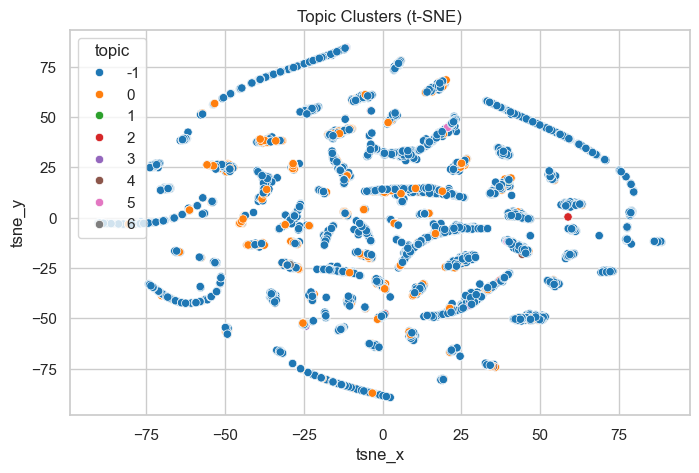

In [26]:
from sklearn.manifold import TSNE

# Transform comments to topic distribution
topic_vectors = lda.transform(dtm)

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(topic_vectors)

df["tsne_x"] = tsne_results[:,0]
df["tsne_y"] = tsne_results[:,1]

# Scatter plot
sns.scatterplot(x="tsne_x", y="tsne_y", hue="topic", palette="tab10", data=df)
plt.title("Topic Clusters (t-SNE)")
plt.show()



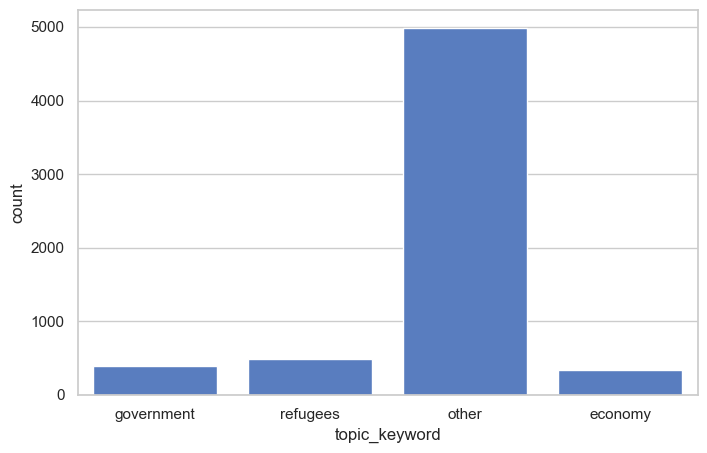

In [27]:
#key word clustering
keywords = {
    "refugees": ["refugee", "asylum", "immigrant"],
    "government": ["government", "policy", "law"],
    "economy": ["jobs", "work", "economy", "taxes"]
}

def assign_keyword_topic(comment):
    for key, words in keywords.items():
        if any(w in comment.lower() for w in words):
            return key
    return "other"

df["topic_keyword"] = df["comment"].apply(assign_keyword_topic)
sns.countplot(x="topic_keyword", data=df)
plt.show()


# Temporal Analysis (Trends Over Time)

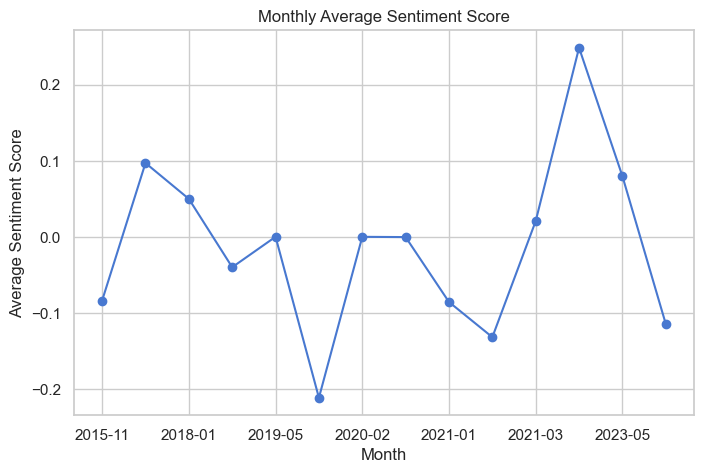

In [ ]:
# Sentiment Shift- checking how positive vs negative comments change month-to-month.
monthly_sentiment = df.groupby("month")["sentiment_score"].mean()
monthly_sentiment.plot(kind="line", marker="o")
plt.title("Monthly Average Sentiment Score")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.show()

Index(['keyword', 'post_title', 'comment', 'score', 'sentiment_score',
       'sentiment_label', 'month', 'border', 'refugee', 'policy', 'visa',
       'illegal', 'citizen'],
      dtype='object')


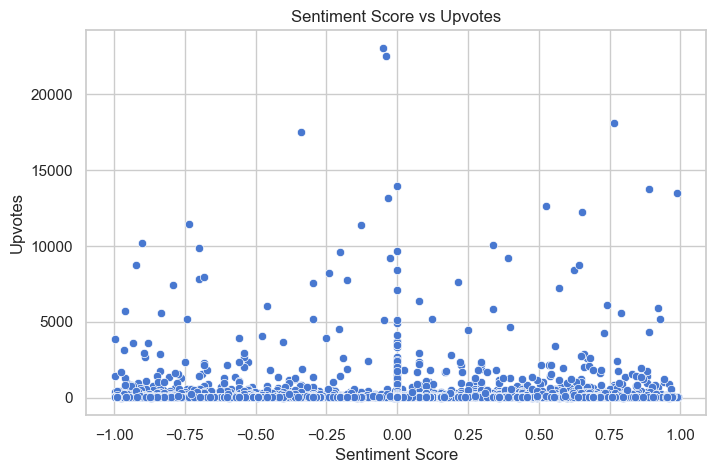

In [ ]:
# Engagement Analysis
# Check available columns
print(df.columns)

# Replace 'upvotes' and 'num_replies' with the correct column names if needed.
# For example, if the column is named 'score' for upvotes and 'replies' for number of replies:

sns.scatterplot(x="sentiment_score", y="score", data=df)
plt.title("Sentiment Score vs Upvotes")
plt.xlabel("Sentiment Score")
plt.ylabel("Upvotes")
plt.show()

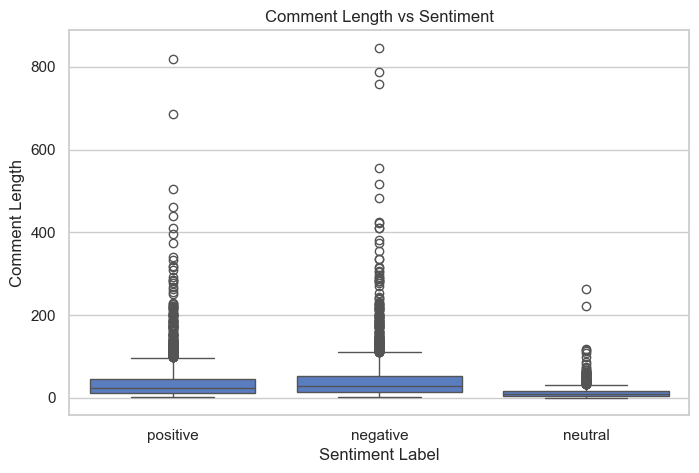

In [ ]:
# Comment Length vs Sentiment
df["comment_length"] = df["comment"].str.split().apply(len)
sns.boxplot(x="sentiment_label", y="comment_length", data=df)
plt.title("Comment Length vs Sentiment")
plt.xlabel("Sentiment Label")
plt.ylabel("Comment Length")
plt.show()